# SVD(Singular Value Decomposition)
***

**SVD**는 **특이값 분해**라고 불리며 **추천시스템**에서 아주 중요한 기본적 방법론으로 사용되고 있습니다. 특이값 분해를 통해 **잠재적인 요인**을 발견하고 분해되었던 행렬을 다시 조합하는 경우에도 큰 강점을 발휘합니다. 기본적으로 특이값 분해는 **정방행렬(행과 열의 크기가 같은 행렬)** 뿐만 아니라 **행과 열의 크기가 다른 행렬**에도 적용이 가능합니다.

사실 SVD는 수학적 이해가 전제가 되어야 하는데 여기서 전부 다룰 수는 없지만 제가 공부할 때 참고를 많이한 사이트의 url을 올려두겠습니다.
https://angeloyeo.github.io/2019/08/01/SVD.html

***
## SVD

In [2]:
import numpy as np
from numpy.linalg import svd

In [5]:
np.random.seed(203)

n = np.random.rand(4, 4)
np.round(n, 3)

array([[0.848, 0.189, 0.451, 0.625],
       [0.97 , 0.208, 0.594, 0.911],
       [0.246, 0.774, 0.636, 0.788],
       [0.88 , 0.366, 0.593, 0.506]])

In [22]:
U, sigma, V_ = svd(n)

In [23]:
print('U 행렬의 값 \n\n',U,'\n')
print('U 행렬의 사이즈 ', U.shape)

U 행렬의 값 

 [[-0.45996214  0.31616228  0.05319299 -0.82803789]
 [-0.58549738  0.29556604  0.58609414  0.47573857]
 [-0.45567645 -0.88463827  0.05666705 -0.08101205]
 [-0.48783872  0.17348561 -0.80650667  0.28541743]] 

U 행렬의 사이즈  (4, 4)


In [32]:
print('sigma 값 \n\n', sigma, '\n')
print('sigma행렬 사이즈 ' ,sigma.shape)

sigma 값 

 [2.47379254 0.72870108 0.2599761  0.03336976] 

sigma행렬 사이즈 (4,)


In [33]:
print('V_ 값 \n\n', V_)
print('V_ 행렬 사이즈 ' , V_.shape)

V_ 값 

 [[-0.60600737 -0.2990354  -0.45869599 -0.57700163]
 [ 0.67250822 -0.68670111 -0.19454978 -0.19576685]
 [-0.31733889 -0.458203   -0.26977316  0.78521875]
 [-0.28246024 -0.47861198  0.82399685 -0.11034483]]
V_ 행렬 사이즈  (4, 4)


#### U, sigma, V_를 내적하면 다시 원래 행렬 값을 반환한다.

In [37]:
sigma_ = np.diag(sigma) # 대각행렬로 변환
re_n = np.dot(np.dot(U, sigma_), V_)

#### 내적한 값을 원래 행렬과 비교하면 값이 똑같은 것을 확인할 수 있다.

In [40]:
np.round(n, 3)

array([[0.848, 0.189, 0.451, 0.625],
       [0.97 , 0.208, 0.594, 0.911],
       [0.246, 0.774, 0.636, 0.788],
       [0.88 , 0.366, 0.593, 0.506]])

In [39]:
np.round(re_n, 3)

array([[0.848, 0.189, 0.451, 0.625],
       [0.97 , 0.208, 0.594, 0.911],
       [0.246, 0.774, 0.636, 0.788],
       [0.88 , 0.366, 0.593, 0.506]])

## Truncated SVD

Truncated SVD는 대각행렬(sigma)의 일부분만 사용하여 분해하는 방식으로 원본 행렬로 완벽하게 복원할 수 없지만 압축된 정보로 빠른 결과는 물론 원본 행렬에 근사하게 분해가 가능하다.

In [41]:
from scipy.sparse.linalg import svds
from scipy.linalg import svd

In [61]:
m = np.random.random((5, 5))

In [62]:
m

array([[0.8260974 , 0.25432838, 0.83570768, 0.23849853, 0.80587368],
       [0.54736306, 0.1676868 , 0.21669553, 0.9309792 , 0.65826426],
       [0.10845495, 0.66955956, 0.52544674, 0.05451561, 0.24535654],
       [0.63949895, 0.70095524, 0.66983844, 0.35934525, 0.20359652],
       [0.45752531, 0.77289103, 0.22980446, 0.11237386, 0.85174203]])

In [63]:
U, sigma, V_ = svd(m, full_matrices = False)

In [70]:
U.shape, sigma.shape, V_.shape

((5, 5), (5,), (5, 5))

In [64]:
U

array([[-0.55716686,  0.09045963, -0.41319826,  0.70513678,  0.11589422],
       [-0.42908228,  0.77104378,  0.14292255, -0.39041298,  0.22029691],
       [-0.29190094, -0.52113005,  0.01464624, -0.27878269,  0.75185305],
       [-0.45798574, -0.26985203, -0.43111403, -0.49135642, -0.53864506],
       [-0.45879885, -0.23002585,  0.78915558,  0.17666045, -0.28743048]])

In [65]:
sigma

array([2.48862793, 0.89483601, 0.61740818, 0.56173853, 0.22870518])

In [66]:
V_

array([[-0.49408329, -0.43587426, -0.45173395, -0.30715532, -0.51719182],
       [ 0.18152766, -0.62979853, -0.29588076,  0.65729536,  0.22543048],
       [-0.28532396,  0.38293037, -0.67066125, -0.0500951 ,  0.56538353],
       [ 0.18724613, -0.49964884,  0.12402561, -0.65369357,  0.52210371],
       [-0.77875448, -0.13070125,  0.49317558,  0.20926922,  0.29907004]])

In [67]:
tr_U, tr_sigma, tr_V = svds(m, k = 3) # 특이값(k)을 4로 설정.

In [69]:
tr_U.shape, tr_sigma.shape, tr_V.shape

((5, 3), (3,), (3, 5))

In [73]:
tr_m = np.dot(np.dot(tr_U, np.diag(tr_sigma)), tr_V)

In [75]:
tr_m

array([[ 0.77257011,  0.45570485,  0.77350891,  0.49188138,  0.59114006],
       [ 0.62766404,  0.06469393,  0.2190479 ,  0.77707403,  0.75769877],
       [ 0.27168717,  0.61378749,  0.46006665, -0.08383916,  0.27569364],
       [ 0.59524599,  0.54694404,  0.76482597,  0.20469685,  0.38454708],
       [ 0.38775071,  0.81388278,  0.24991634,  0.19100114,  0.81958996]])

In [74]:
m - tr_m

array([[ 0.0535273 , -0.20137647,  0.06219877, -0.25338285,  0.21473362],
       [-0.08030097,  0.10299287, -0.00235237,  0.15390517, -0.09943451],
       [-0.16323223,  0.05577207,  0.06538009,  0.13835477, -0.0303371 ],
       [ 0.04425296,  0.1540112 , -0.09498753,  0.1546484 , -0.18095056],
       [ 0.0697746 , -0.04099175, -0.02011188, -0.07862727,  0.03215208]])

In [78]:
from sklearn.decomposition import TruncatedSVD
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

In [79]:
iris = load_iris()
data = iris.data

In [81]:
tsvd = TruncatedSVD(n_components = 2)
iris_ts = tsvd.fit_transform(data)

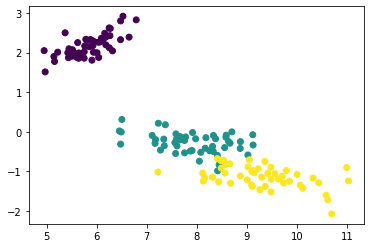

In [85]:
plt.scatter(iris_ts[:, 0], iris_ts[:, 1], c = iris.target)
plt.show()